## Contexto
#### Una compañía emergente llamada Leaked Videos situada en Colombia está pensando en contratar y/o entrenar YouTubers para producir contenido que tenga alto impacto en diferentes culturas y generar muchos seguidores. Para ello han estado minuciosamente siguiendo las estadísticas de YouTube en algunos de los países que quieren tener impacto. Sin embargo, sus motivaciones de producción pueden variar en función del objetivo, es así que algunos de los videos que quieren producir quieren volverlos virales, otros lo quieren enfocar y garantizar que le guste a un público específico sin que necesariamente sea viral, y otros sencillamente quieren volverlos polémicos para dar de qué hablar a la opinión pública.

## Problema a resolver
#### Los datos recolectados son todos valiosos para diferentes contextos pero no son necesariamente todos útiles para la resolución de problemas, es así pues que el reto a resolver las siguientes preguntas:
### ● Qué canales o trendings deberían ser vistos como referentes si se quisiera realizar contenido para los siguientes propósitos:
* ○ Contenido viral.
* ○ Contenido polémico.
* ○ Contenido para una sección específica (de terror, de navidad o de cualquier sección que se te ocurra).
### ● ¿Podemos identificar en los datos recolectados un potencial One hit wonder?
### ● Si el objetivo es maximizar las vistas de un video producido:
* ○ ¿Cuál es el mejor periodo del año para publicar el video?
* ○ ¿Cuáles son los tags que podrían posicionarlo mejor?
* ○ ¿Qué características debería tener el título del vídeo?


In [202]:
#importacion de librerias
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as d, timedelta as td,datetime as dt 
from dateutil.relativedelta import relativedelta as rd
import json
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import scipy.stats as st
import seaborn as sns
from wordcloud import WordCloud
import statistics

#### para resolver la primer pregunta:
### ● Qué canales o trendings deberían ser vistos como referentes si se quisiera realizar contenido para los siguientes propósitos:
* ○ Contenido viral.
* ○ Contenido polémico.
* ○ Contenido para una sección específica (de terror, de navidad o de cualquier sección que se te ocurra).

#### primero debemos analizar que relacion hay entre los datos, especificamente las vistas, likes, dislikes y cantidad de comentarios. Para identificar contenidos virales y polémicos.

In [203]:
#funcion para leer el csv y convertilo a dataframe sin necesidad de cambiar el formato del texto original
def leer_csv(ruta):
    with open(ruta, mode='r',encoding="utf8",errors ='ignore') as csv_file:
        csv_reader = csv.reader(csv_file)
        line_count = 0
        filas = []
        columnas = []
        for row in csv_reader:
            if line_count == 0:
                columnas = row
            else:
                filas+=[row]
            line_count+=1
    df = pd.DataFrame (filas, columns = columnas)
    return df# La lista de las columnas que nos interesa


In [204]:
columns_list = ["views", "likes", "dislikes", "comment_count","category_id"]

DF_US = pd.read_csv("Datos/USvideos.csv", usecols = columns_list) # USA
DF_RU = pd.read_csv("Datos/RUvideos.csv", usecols = columns_list, encoding='ISO-8859-1') # Russia (usando diferente codificacion aca)
DF_MX = pd.read_csv("Datos/MXvideos.csv", usecols = columns_list, encoding='ISO-8859-1') # Mexico (usando diferente codificacion aca)
DF_KR = pd.read_csv("Datos/KRvideos.csv", usecols = columns_list, encoding='ISO-8859-1') # Corea del Sur (usando diferente codificacion aca)
DF_JP = pd.read_csv("Datos/JPvideos.csv", usecols = columns_list, encoding='ISO-8859-1') # Japon (usando diferente codificacion aca)
DF_IN = pd.read_csv("Datos/INvideos.csv", usecols = columns_list) # India
DF_GB = pd.read_csv("Datos/GBvideos.csv", usecols = columns_list) # Gran Bretaña (UK)
DF_FR = pd.read_csv("Datos/FRvideos.csv", usecols = columns_list) # Francia
DF_DE = pd.read_csv("Datos/DEvideos.csv", usecols = columns_list) # Alemania
DF_CA = pd.read_csv("Datos/CAvideos.csv", usecols = columns_list) # Canada

DF = pd.concat([DF_US,DF_RU,DF_MX,DF_KR,DF_JP,DF_IN,DF_GB,DF_FR,DF_DE,DF_CA])
DF

,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518
...,...,...,...,...,...
40876,24,80685,1701,99,1312
40877,24,103339,460,66,51
40878,20,773347,25900,224,3881
40879,25,115225,2115,182,1672


<AxesSubplot:>

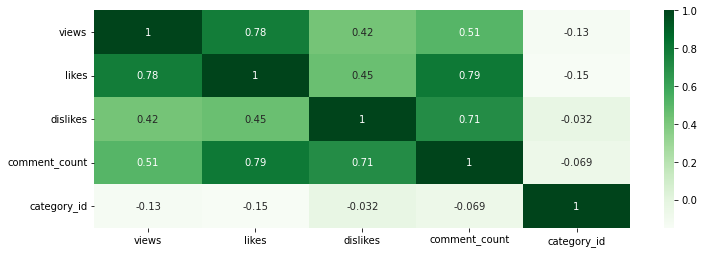

In [205]:
# grafico de correlacion
# tamaño
plt.figure(figsize=(12, 4))

# Lista de las columnas que vamos a usar
list_of_columns = ["views", "likes", "dislikes", "comment_count","category_id"]

# Correlacion entre las variables
World_corr = DF[list_of_columns].corr()

sns.heatmap(World_corr, annot = True, cmap = "Greens")

In [206]:
DF_US = pd.read_csv("Datos/USvideos.csv") # USA
DF_RU = leer_csv("Datos/RUvideos.csv") # Russia (usando diferente codificacion aca)
DF_MX = leer_csv("Datos/MXvideos.csv") # Mexico (usando diferente codificacion aca)
DF_KR = leer_csv("Datos/KRvideos.csv") # Corea del Sur (usando diferente codificacion aca)
DF_JP = leer_csv("Datos/JPvideos.csv") # Japon (usando diferente codificacion aca)
DF_IN = pd.read_csv("Datos/INvideos.csv") # India
DF_GB = pd.read_csv("Datos/GBvideos.csv") # Gran Bretaña (UK)
DF_FR = pd.read_csv("Datos/FRvideos.csv") # Francia
DF_DE = pd.read_csv("Datos/DEvideos.csv") # Alemania
DF_CA = pd.read_csv("Datos/CAvideos.csv") # Canada

DF1 = pd.concat([DF_US,DF_RU,DF_MX,DF_KR,DF_JP,DF_IN,DF_GB,DF_FR,DF_DE,DF_CA])
DF1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


#### Podemos observar que los  likes estan muy correlacionados con la cantidad de visitas que tiene un video, esto es un indicio de que un video que tenga muchos likes es muy viral.
#### Ahora miremos todas las variables de los datos.


In [207]:
fechasVirales = [list(map(lambda x:int(x),i.split('.'))) for i in DF1['trending_date'].values]
fechasVirales = [[i[0]+2000,i[1],i[2]] for i in fechasVirales]
fechasVirales = [dt(year = i[0],month = i[2], day = i[1]) for i in fechasVirales]
ejemplo = list(map(lambda x: int(x),['2017', '14', '11']))
ejemplo
fechaViral = dt(year = ejemplo[0],month = ejemplo[2], day = ejemplo[1])
fechaViral
fechasVirales[0]

datetime.datetime(2017, 11, 14, 0, 0)

In [208]:
fechasPublicacion = [list(map(lambda x:int(x),i.split('T')[0].split('-'))) for i in DF1['publish_time'].values]
fechasPublicacion = [dt(year = i[0],month = i[1], day = i[2]) for i in fechasPublicacion]
ejemplo = list(map(lambda x: int(x),['2017', '11', '13']))
ejemplo
fechaPublicacion = dt(year = ejemplo[0],month = ejemplo[1], day = ejemplo[2])
fechaPublicacion
fechasPublicacion[0]

datetime.datetime(2017, 11, 13, 0, 0)

In [209]:
diasVirales = [rd(i[0],i[1]).days for i in zip(fechasVirales,fechasPublicacion)]
DF['Dias Virales'] = diasVirales
DF

,category_id,views,likes,dislikes,comment_count,Dias Virales
0,22,748374,57527,2966,15954,1
1,24,2418783,97185,6146,12703,1
2,23,3191434,146033,5339,8181,2
3,24,343168,10172,666,2146,1
4,24,2095731,132235,1989,17518,2
...,...,...,...,...,...,...
40876,24,80685,1701,99,1312,1
40877,24,103339,460,66,51,1
40878,20,773347,25900,224,3881,3
40879,25,115225,2115,182,1672,1


#### ahora que  calculamos los dias que se demoraron en ser virales los videos, observemos que relacion hay entre estos dias y las variables analizadas anteriormente.

,views,likes,dislikes,comment_count,category_id,Dias Virales
views,1.000000,0.777796,0.421653,0.510030,-0.133506,0.261255
likes,0.777796,1.000000,0.453710,0.794490,-0.149572,0.233414
dislikes,0.421653,0.453710,1.000000,0.705182,-0.032110,0.093768
comment_count,0.510030,0.794490,0.705182,1.000000,-0.068700,0.135447
category_id,-0.133506,-0.149572,-0.032110,-0.068700,1.000000,-0.140625
Dias Virales,0.261255,0.233414,0.093768,0.135447,-0.140625,1.000000


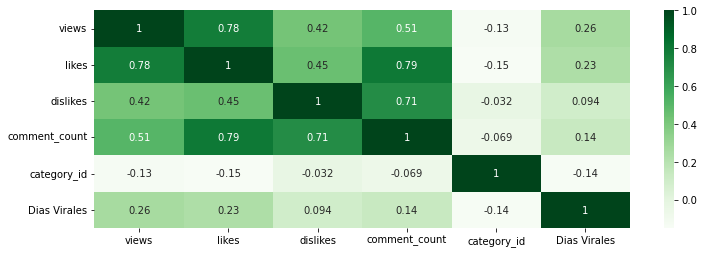

In [210]:
# grafico de correlacion
# tamaño
plt.figure(figsize=(12, 4))

# Lista de las columnas que vamos a usar
list_of_columns = ["views", "likes", "dislikes", "comment_count","category_id",'Dias Virales']

# Correlacion entre las variables
World_corr = DF[list_of_columns].corr()

sns.heatmap(World_corr, annot = True, cmap = "Greens")
DF[list_of_columns].corr()

#### podemos observar que existe una relacion no muy fuerte entre la cantidad de dias virales con las visitas, esto nos da un inidicio de que probablemente algunos videos obtienen muchas visitas dependiendo de la cantidad de dias que se demore en ser viral.

#### partiendo con los datos suministrados, buscaremos los videos con mas linkes en todo el dataset(100) para poder asi identificar los patrones que hacen que un video sea viral.


In [211]:
DF_US = pd.read_csv("Datos/USvideos.csv") # USA
DF_RU = leer_csv("Datos/RUvideos.csv") # Russia (usando diferente codificacion aca)
DF_MX = leer_csv("Datos/MXvideos.csv") # Mexico (usando diferente codificacion aca)
DF_KR = leer_csv("Datos/KRvideos.csv") # Corea del Sur (usando diferente codificacion aca)
DF_JP = leer_csv("Datos/JPvideos.csv") # Japon (usando diferente codificacion aca)
DF_IN = pd.read_csv("Datos/INvideos.csv") # India
DF_GB = pd.read_csv("Datos/GBvideos.csv") # Gran Bretaña (UK)
DF_FR = pd.read_csv("Datos/FRvideos.csv") # Francia
DF_DE = pd.read_csv("Datos/DEvideos.csv") # Alemania
DF_CA = pd.read_csv("Datos/CAvideos.csv") # Canada

DF = pd.concat([DF_US,DF_RU,DF_MX,DF_KR,DF_JP,DF_IN,DF_GB,DF_FR,DF_DE,DF_CA])
DF['views'] = DF['views'].astype(int)
DF['likes'] = DF['likes'].astype(int)
DF['dislikes'] = DF['dislikes'].astype(int)
DF['comment_count'] = DF['comment_count'].astype(int)
DF['category_id'] = DF['category_id'].astype(int)
DF

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [212]:
def print_top_videos(category: str):
    df_temp = DF[["title", category]].sort_values(by=category, ascending=False)
    
    titles = []
    rank = 1
    for title, views in df_temp.values:
        if title not in titles:
            titles.append(title)
            print("Rank {:<5} | title: {:<70} | {}: {:<20}".format(rank, title, category, views))  # printing alignment
            rank += 1
            if rank == 11:
                break

print_top_videos('views')
DF[["title", 'views','channel_title','likes']].sort_values(by='views', ascending=False)[:500].to_excel('Videos Virales Views.xlsx',index = False)

Rank 1     | title: Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon | views: 424538912           
Rank 2     | title: Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial | views: 337621571           
Rank 3     | title: Bad Bunny - Amorfoda | Video Oficial                                   | views: 328860380           
Rank 4     | title: Ozuna x Romeo Santos - El Farsante Remix                               | views: 288811992           
Rank 5     | title: Childish Gambino - This Is America (Official Video)                    | views: 259721696           
Rank 6     | title: Drake - God’s Plan                                                     | views: 258164991           
Rank 7     | title: Ariana Grande - No Tears Left To Cry                                   | views: 208876887           
Rank 8     | title: Becky G, Natti Natasha - Sin Pijama (Official Video)                   | views: 200862743           
Rank 9     

In [213]:
print_top_videos('likes')
DF[["title", 'views','channel_title','likes']].sort_values(by='likes', ascending=False)[:500].to_excel('Videos Virales Likes.xlsx',index = False)


Rank 1     | title: BTS (방탄소년단) 'FAKE LOVE' Official MV                                    | likes: 5613827             
Rank 2     | title: Childish Gambino - This Is America (Official Video)                    | likes: 5444541             
Rank 3     | title: Drake - God’s Plan                                                     | likes: 4737873             
Rank 4     | title: Bad Bunny - Amorfoda | Video Oficial                                   | likes: 3823879             
Rank 5     | title: Ariana Grande - No Tears Left To Cry                                   | likes: 3394437             
Rank 6     | title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind                     | likes: 3312868             
Rank 7     | title: BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV                  | likes: 2960250             
Rank 8     | title: Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon | likes: 2818771             
Rank 9     | title: Marvel S

#### Ahora observemos que caracteristicas tienen estos videos populares(categoria, comentarios, tags, entre otros).


In [214]:
def print_top_videos(category: str):
    df_temp = DF[["title","category_id","channel_title", category]].sort_values(by=category, ascending=False) 
    titles = []
    rank = 1
    for title, category, tags, views in df_temp.values:
        if title not in titles:
            titles.append(title)
            print("Rank {:<5} | title: {:<70} | Channel Title: {} | category: {} | views: {:<20}".format(rank, title, tags, category, views))  # printing alignment
            rank += 1
            if rank == 11:
                break
print_top_videos('views')

Rank 1     | title: Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon | Channel Title: NickyJamTV | category: 10 | views: 424538912           
Rank 2     | title: Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial | Channel Title: Flow La Movie | category: 10 | views: 337621571           
Rank 3     | title: Bad Bunny - Amorfoda | Video Oficial                                   | Channel Title: Bad Bunny | category: 10 | views: 328860380           
Rank 4     | title: Ozuna x Romeo Santos - El Farsante Remix                               | Channel Title: Ozuna | category: 10 | views: 288811992           
Rank 5     | title: Childish Gambino - This Is America (Official Video)                    | Channel Title: ChildishGambinoVEVO | category: 10 | views: 259721696           
Rank 6     | title: Drake - God’s Plan                                                     | Channel Title: DrakeVEVO | category: 10 | views: 258164991  

In [215]:
print_top_videos('likes')

Rank 1     | title: BTS (방탄소년단) 'FAKE LOVE' Official MV                                    | Channel Title: ibighit | category: 10 | views: 5613827             
Rank 2     | title: Childish Gambino - This Is America (Official Video)                    | Channel Title: ChildishGambinoVEVO | category: 10 | views: 5444541             
Rank 3     | title: Drake - God’s Plan                                                     | Channel Title: DrakeVEVO | category: 10 | views: 4737873             
Rank 4     | title: Bad Bunny - Amorfoda | Video Oficial                                   | Channel Title: Bad Bunny | category: 10 | views: 3823879             
Rank 5     | title: Ariana Grande - No Tears Left To Cry                                   | Channel Title: ArianaGrandeVevo | category: 10 | views: 3394437             
Rank 6     | title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind                     | Channel Title: YouTube Spotlight | category: 24 | views: 3312868             

#### Con esta informacion obtenemos los canales(basados en cantidad de likes y views) que se deberian ver como referente para realizar contenido viral

### contenido polemico

#### para poder identificar si un conenido es polemico o no, analizemos nuevamente la correlacion de las variables previas:


,views,likes,dislikes,comment_count,category_id,Dias Virales
views,1.000000,0.777796,0.421653,0.510030,-0.133506,0.261255
likes,0.777796,1.000000,0.453710,0.794490,-0.149572,0.233414
dislikes,0.421653,0.453710,1.000000,0.705182,-0.032110,0.093768
comment_count,0.510030,0.794490,0.705182,1.000000,-0.068700,0.135447
category_id,-0.133506,-0.149572,-0.032110,-0.068700,1.000000,-0.140625
Dias Virales,0.261255,0.233414,0.093768,0.135447,-0.140625,1.000000


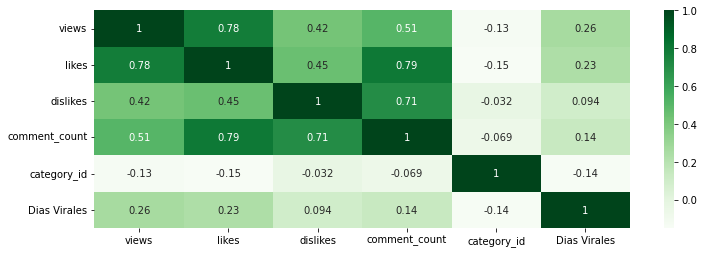

In [216]:
# grafico de correlacion
# tamaño
plt.figure(figsize=(12, 4))

# Lista de las columnas que vamos a usar
list_of_columns = ["views", "likes", "dislikes", "comment_count","category_id",'Dias Virales']

sns.heatmap(World_corr, annot = True, cmap = "Greens")
World_corr

#### sabemos que un contenido polemico se define por tener una cantidad de dislikes muy grande y comentarios(pues al ser un contenido controversial, la gente suele dar su opinion respecto a este mismo).
#### al analizar la matriz de correlacion(pearson) podemos osbservar una gran dependencia entre la cantidad de comentarios respecto a los dislike de un video.
#### miremos los contenidos con mas comentarios y analizemos al respecto.


In [217]:
def print_top_videos(category: str):
    df_temp = DF[["title","category_id","channel_title","tags", category]].sort_values(by=category, ascending=False) 
    titles = []
    rank = 1
    for title, categori, channel, tags, views in df_temp.values:
        if title not in titles:
            titles.append(title)
            print("Rank {:<5} | title: {:<70} | Channel Title: {} | Tags: {}  | category: {}  | {}: {:<20}".format(rank, title,channel, tags.split('|'), categori, category, views))  # printing alignment
            rank += 1
            if rank == 11:
                break
print_top_videos('comment_count')
DF[["title", 'views','channel_title','likes','dislikes','comment_count']].sort_values(by='comment_count', ascending=False)[:500].to_excel('Videos Polemicos Comentarios.xlsx',index = False)


Rank 1     | title: So Sorry.                                                              | Channel Title: Logan Paul Vlogs | Tags: ['logan paul vlog', '"logan paul"', '"logan"', '"paul"', '"olympics"', '"logan paul youtube"', '"vlog"', '"daily"', '"comedy"', '"hollywood"', '"parrot"', '"maverick"', '"bird"', '"maverick clothes"', '"logan paul apology"', '"suicide forest"', '"japanese suicide forest"', '"suicide"', '"logan paul suicide"', '"suicide apology"']  | category: 24  | comment_count: 1626501             
Rank 2     | title: BTS (방탄소년단) 'FAKE LOVE' Official MV                                    | Channel Title: ibighit | Tags: ['BIGHIT', '"빅히트"', '"방탄소년단"', '"BTS"', '"BANGTAN"', '"방탄"', '"FAKE LOVE"', '"FAKE_LOVE"', '"fake love"']  | category: 10  | comment_count: 1228655             
Rank 3     | title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind                     | Channel Title: YouTube Spotlight | Tags: ['Rewind', '"Rewind 2017"', '"youtube rewind 2017"', '"#YouTu

In [218]:
print_top_videos('dislikes')
DF[["title", 'views','channel_title','likes','dislikes','comment_count']].sort_values(by='dislikes', ascending=False)[:500].to_excel('Videos Polemicos Comentarios.xlsx',index = False)


Rank 1     | title: So Sorry.                                                              | Channel Title: Logan Paul Vlogs | Tags: ['logan paul vlog', '"logan paul"', '"logan"', '"paul"', '"olympics"', '"logan paul youtube"', '"vlog"', '"daily"', '"comedy"', '"hollywood"', '"parrot"', '"maverick"', '"bird"', '"maverick clothes"', '"logan paul apology"', '"suicide forest"', '"japanese suicide forest"', '"suicide"', '"logan paul suicide"', '"suicide apology"']  | category: 24  | dislikes: 1944971             
Rank 2     | title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind                     | Channel Title: YouTube Spotlight | Tags: ['Rewind', '"Rewind 2017"', '"youtube rewind 2017"', '"#YouTubeRewind"', '"Rewind 2016"', '"Dan and Phil"', '"Grace Helbig"', '"HolaSoyGerman"', '"Lilly Singh"', '"Markiplier"', '"Swoozie"', '"Rhett Link"', '"Liza Koshy"', '"Dolan Twins"', '"Lele Pons"', '"Jake Paul"', '"Logan Paul"', '"KSI"', '"Joey Graceffa"', '"Casey Neistat"', '"Poppy"', '"Niana

#### podemos observar los 10 canales que podiamos ver como referencia para contenido polemico 
### Contenido para una seccion especifica(de terror, de navidad o de cualquier seccion que se te ocurra).
#### primero mostraremos los videos mas populares(en cantidad de vistas) publicados en epocas navideñas


In [219]:
DF

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [220]:

f = open('Datos\CA_category_id.json')
 
data = json.load(f)
 
f.close()
categorias = {i.get('id'):i.get('snippet').get('title') for i in data.get('items')}
categorias
DF['category_id'] = list(map(lambda x: categorias.get(str(x)),DF['category_id']))
DF['category_id']

0         People & Blogs
1          Entertainment
2                 Comedy
3          Entertainment
4          Entertainment
              ...       
40876      Entertainment
40877      Entertainment
40878             Gaming
40879    News & Politics
40880      Entertainment
Name: category_id, Length: 375942, dtype: object

In [221]:
def print_top_videos(category: str):
    df_temp = DF[["title","category_id","channel_title", category]].sort_values(by=category, ascending=False) 
    df_temp = df_temp[df_temp['category_id']== 'Gaming']
    titles = []
    rank = 1
    for title, category, tags, views in df_temp.values:
        if title not in titles:
            titles.append(title)
            print("Rank {:<5} | title: {:<70} | Channel Title: {} | category: {} | views: {:<20}".format(rank, title, tags, category, views))  # printing alignment
            rank += 1
            if rank == 11:
                break
print_top_videos('views')
DF2 = DF[DF['category_id']== 'Gaming']
DF2[["title", 'views','channel_title','likes']].sort_values(by='views', ascending=False)[:500].to_excel('Videos Gaming Views.xlsx',index = False)

Rank 1     | title: Yodeling Walmart Kid EDM Remix (OFFICIAL AUDIO) + DOWNLOAD LINK        | Channel Title: GalacticFusion | category: Gaming | views: 18158133            
Rank 2     | title: Clash Royale: CLAN WARS IS HERE!                                       | Channel Title: Clash Royale | category: Gaming | views: 16935442            
Rank 3     | title: TORNEO DE YOUTUBERS #YTBattleRoyale - Fortnite - elrubiusOMG           | Channel Title: elrubiusOMG | category: Gaming | views: 15919643            
Rank 4     | title: Clash Royale: Meet the Rascals! (New Card!)                            | Channel Title: Clash Royale | category: Gaming | views: 15000691            
Rank 5     | title: CLASH ROYALE: EPIC COMEBACK!                                           | Channel Title: Clash Royale | category: Gaming | views: 14589314            
Rank 6     | title: Town Hall 12 Update is Here! (Clash of Clans Official)                 | Channel Title: Clash of Clans | category: Gaming | views

In [222]:
fechasVirales = [list(map(lambda x:int(x),i.split('.'))) for i in DF1['trending_date'].values]
fechasVirales = [[i[0]+2000,i[1],i[2]] for i in fechasVirales]
fechasVirales = [dt(year = i[0],month = i[2], day = i[1]) for i in fechasVirales]

DF["trending_date"] = fechasVirales
fechasPublicacion = [list(map(lambda x:int(x),i.split('T')[0].split('-'))) for i in DF1['publish_time'].values]
fechasPublicacion = [dt(year = i[0],month = i[1], day = i[2]) for i in fechasPublicacion]
fechaPublicacion = dt(year = ejemplo[0],month = ejemplo[1], day = ejemplo[2])

DF["publish_time"] = fechasPublicacion
DF[DF['video_id'] == 'PepMjZ6IYdE']
DF1[DF1['video_id'] == 'PepMjZ6IYdE']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
3643,PepMjZ6IYdE,17.02.12,cooper family trip to NASA || Shedon finally g...,Sheikh Musa,22,2017-12-01T10:50:20.000Z,"yong sheldon|""sheldon cooper""",310125,2234,110,163,https://i.ytimg.com/vi/PepMjZ6IYdE/default.jpg,False,False,False,"Young Sheldon S1 EP6 A Patch, a Modem, and ..."
3941,PepMjZ6IYdE,17.03.12,cooper family trip to NASA || Shedon finally g...,Sheikh Musa,22,2017-12-01T10:50:20.000Z,"yong sheldon|""sheldon cooper""",415558,2719,149,193,https://i.ytimg.com/vi/PepMjZ6IYdE/default.jpg,False,False,False,"Young Sheldon S1 EP6 A Patch, a Modem, and ..."
3677,PepMjZ6IYdE,17.02.12,cooper family trip to NASA || Shedon finally g...,Sheikh Musa,22,2017-12-01T10:50:20.000Z,"yong sheldon|""sheldon cooper""",310086,2234,110,163,https://i.ytimg.com/vi/PepMjZ6IYdE/default.jpg,False,False,False,"Young Sheldon S1 EP6 A Patch, a Modem, and ..."
3885,PepMjZ6IYdE,17.03.12,cooper family trip to NASA || Shedon finally g...,Sheikh Musa,22,2017-12-01T10:50:20.000Z,"yong sheldon|""sheldon cooper""",415558,2719,149,193,https://i.ytimg.com/vi/PepMjZ6IYdE/default.jpg,False,False,False,"Young Sheldon S1 EP6 A Patch, a Modem, and ..."


In [223]:
Navidad = pd.DataFrame([i for i in DF[['trending_date','channel_title','likes','views']].values if pd.Timestamp(i[0]).month == 12], columns = ['trending_date','channel_title','likes','views'])
Navidad

,trending_date,channel_title,likes,views
0,2017-12-01,Marvel Entertainment,2157727,56367282
1,2017-12-01,Snapchat,0,1894443
2,2017-12-01,The New York Times,7006,224270
3,2017-12-01,TODAY,10041,1717225
4,2017-12-01,Sony Pictures Entertainment,5816,616077
...,...,...,...,...
54358,2017-12-31,Eh Bee Family,13013,158108
54359,2017-12-31,Flowers Comedy,3084,415514
54360,2017-12-31,JesseAndMike,1660,68187
54361,2017-12-31,Alena TV,3606,70294


In [224]:
def print_top_videos(category: str):
    df_temp = Navidad[["channel_title", category]].sort_values(by=category, ascending=False) 
    titles = []
    rank = 1
    for title, views in df_temp.values:
        if title not in titles:
            titles.append(title)
            print("Rank {:<5} | Channel Title: {}  | views: {:<20}".format(rank, title, views))  # printing alignment
            rank += 1
            if rank == 11:
                break
print_top_videos('views')
Navidad[['views','channel_title','likes']].sort_values(by='views', ascending=False)[:500].to_excel('Videos navideños Views.xlsx',index = False)

Rank 1     | Channel Title: YouTube Spotlight  | views: 169884583           
Rank 2     | Channel Title: LuisFonsiVEVO  | views: 143408235           
Rank 3     | Channel Title: Marvel Entertainment  | views: 100672931           
Rank 4     | Channel Title: Ed Sheeran  | views: 76816483            
Rank 5     | Channel Title: PostMaloneVEVO  | views: 71173287            
Rank 6     | Channel Title: jypentertainment  | views: 55754734            
Rank 7     | Channel Title: 5-Minute Crafts  | views: 54155921            
Rank 8     | Channel Title: ibighit  | views: 54083634            
Rank 9     | Channel Title: Lele Pons  | views: 43460605            
Rank 10    | Channel Title: Universal Pictures  | views: 41612497            


### ahora analicemos un one hit wonder
#### un one hit wonder es una cancion de un solo exito, es decir: una cancion muy famosa y conocida, pero es la unica conocida del artita que la produjo. Con base en esta informacion, para poder identificar si es posible identificar un potencial One Hit Wonder, debemos observar solo los videos de categoria music.

In [225]:
Music = DF[DF['category_id'] == 'Music']
Music[200:240]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1112,eQVhAN7-IAw,2017-11-19,The Making of a Song: “Delicate” – watch more ...,Taylor Swift,Music,2017-11-15,"DIRECTV|""DIRECTVNOW""|""ATT""|""AT&T""|""The Making ...",736587,42050,630,2466,https://i.ytimg.com/vi/eQVhAN7-IAw/default.jpg,False,False,False,A glimpse into Taylor’s songwriting process as...
1125,qDAxDcjgn-8,2017-11-19,Taylor Swift - Reputation ALBUM REVIEW,theneedledrop,Music,2017-11-14,"album|""review""|""music""|""reviews""|""indie""|""unde...",291272,11130,792,2593,https://i.ytimg.com/vi/qDAxDcjgn-8/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=3tmd-C...
1126,fdpYWltgYMk,2017-11-19,Tegan and Sara present The Con X: Covers – Flo...,Tegan and Sara,Music,2017-11-16,"Tegan and Sara|""The Con X: Covers""|""The Con""|""...",5258,433,1,30,https://i.ytimg.com/vi/fdpYWltgYMk/default.jpg,False,False,False,Directed & Animated by Kristine Thune\nOfficia...
1129,aHsfKnrNCG4,2017-11-19,mad eye moody - moving eyeball prop,daronjay,Music,2017-11-14,[none],3390,9,0,1,https://i.ytimg.com/vi/aHsfKnrNCG4/default.jpg,False,False,False,NaN
1140,xhBMUFDdiok,2017-11-19,Gin Wigmore - Cabrona,GinWigmoreVEVO,Music,2017-11-16,"Gin Wigmore|""Cabrona""|""Carbona""|""Girl Gang""|""G...",4843,387,13,27,https://i.ytimg.com/vi/xhBMUFDdiok/default.jpg,False,False,False,‘Cabrona’ Stream or Buy – https://GinWigmore.l...
1142,oddXT5uaRb8,2017-11-19,[MV] Samuel(사무엘) _ Candy(캔디),1theK (원더케이),Music,2017-11-16,"Kpop|""1theK""|""원더케이""|""loen""|""로엔""|""뮤비""|""티져""|""MV""...",1357577,172690,1923,9445,https://i.ytimg.com/vi/oddXT5uaRb8/default.jpg,False,False,False,"[MV] Samuel(사무엘) _ Candy(캔디)\n\n*****\nHello, ..."
1148,C_SJgw5MVFY,2017-11-19,MisterWives - Oh Love,MisterWivesVEVO,Music,2017-11-17,"MisterWives|""Oh""|""Love""|""Photo""|""Finish""|""Repu...",12984,1304,21,148,https://i.ytimg.com/vi/C_SJgw5MVFY/default.jpg,False,False,False,Oh Love (Official Video)\nTaken from the album...
1149,LduRwIc7eBA,2017-11-19,Kesha - Learn To Let Go in the Live Lounge,BBCRadio1VEVO,Music,2017-11-15,"Kesha|""Learn To Let Go""|""BBC""|""Radio 1""|""Live ...",39467,2032,23,134,https://i.ytimg.com/vi/LduRwIc7eBA/default.jpg,False,False,False,Kesha performs Learn To Let Go in the BBC Radi...
1151,ENr6CXm1YxU,2017-11-19,Rachel Platten - Whole Heart (Audio),RachelPlattenVEVO,Music,2017-11-15,"Columbia|""Pop""|""Rachel Platten""|""Whole Heart""",79057,2048,81,89,https://i.ytimg.com/vi/ENr6CXm1YxU/default.jpg,False,False,False,Rachel Platten - Whole Heart (Audio Video)\nG...
1161,5E4ZBSInqUU,2017-11-19,Marshmello - Blocks (Official Music Video),marshmello,Music,2017-11-13,"marshmello|""blocks""|""marshmello blocks""|""block...",4756676,236846,4695,14088,https://i.ytimg.com/vi/5E4ZBSInqUU/default.jpg,False,False,False,WATCH SILENCE MUSIC VIDEO ▶ https://youtu.be/T...


In [226]:
Music1 = Music.groupby(['title','channel_title']).first()

Music1

,,video_id,trending_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
title,channel_title,,,,,,,,,,,,,,
PEDRO INFANTE ERA CHAPARRITO - ISMAEL RODRIGUEZ,CUCO LEYVA,wmUtLfv5ah8,2018-03-28,Music,2018-03-27,PEDRO INFANTE,11137,122,15,33,https://i.ytimg.com/vi/wmUtLfv5ah8/default.jpg,FALSE,FALSE,FALSE,NUESTRO QUERIDO Y ADMIRADO PEDRO INFANTE NO ER...
SI SOY PEDRO INFANTE - ANTONIO PEDRO A TERESITA CEDILLO,CUCO LEYVA,Cgl2sxx8iN0,2017-12-02,Music,2017-12-01,PEDRO INFANTE,39417,391,74,82,https://i.ytimg.com/vi/Cgl2sxx8iN0/default.jpg,FALSE,FALSE,FALSE,NUESTRA AMIGA TERESITA CEDILLO RELATA MUCHAS Y...
#1 ANLATAMIYORUM,Bilgisayar Dersleri,Dh6YVpRTJQE,2018-01-25,Music,2017-12-03,"ANLATAMIYORUM|""ANLATAMIYORUM ŞİİRİ""|""NECİP FAZ...",22682,2,2,0,https://i.ytimg.com/vi/Dh6YVpRTJQE/default.jpg,FALSE,FALSE,FALSE,ANLATAMIYORUM Şiiri \nOrhan Veli Kanık
#11 J'M'EN FOUS - MARION SÉCLIN & EMMA OSCAR (Vianney cover),Marion Seclin,H5FKxgpnfFQ,2018-03-29,Music,2018-03-28,"j'm'en fous""|""cover""|""vianney""|""emma oscar""|""n...",75917,8961,225,504,https://i.ytimg.com/vi/H5FKxgpnfFQ/default.jpg,False,False,False,VERSION ORIGINALE\nVianney\n►https://www.youtu...
#AFTERRAP : Les Victoires de la Musiques / Les feats rap FR - rap US,Mouv' - Ta radio hip-hop,T3NeDOqOfO4,2018-01-16,Music,2018-01-15,"Mouv'""|""radio""|""After Rap""|""Genono""|""Yérim Sar...",2875,108,0,19,https://i.ytimg.com/vi/T3NeDOqOfO4/default.jpg,False,False,False,"After Rap, c'est le débrief du rap français ch..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🔴방탄소년단 따라한 일본 탄도 소년단의 정체는!?🔵,리얼스토리TV,bo1QsvVPWks,2018-06-08,Music,2018-06-07,"방탄소년단|""BTS""|""아이돌""|""k-pop""|""탄도소년단""",34615,167,56,289,https://i.ytimg.com/vi/bo1QsvVPWks/default.jpg,FALSE,FALSE,FALSE,전 세계적인 관심과폭발적인 인기를 얻고있는글로벌 그룹 방탄소년단그런데 방탄소년단을 ...
🔴방탄소년단 인기가 얼마나 대단한지 보여주는 영상🔵,리얼스토리TV,VBc1w5tIMq0,2018-05-30,Music,2018-05-28,"방탄소년단|""BTS""|""케이팝""|""아이돌""|""K-POP""",48592,469,16,67,https://i.ytimg.com/vi/VBc1w5tIMq0/default.jpg,FALSE,FALSE,FALSE,방탄이 미국을 정복했다-미국 언론 잡지 롤링스톤-방탄소년단 춤과 노래에는진심이 담겨...
🔴잠이 스르륵~~ 델타파 수면유도음악 ㅣ 불명증 완화 ㅣ 잠잘때 듣는 음악 ㅣ 잠잘오는 ASMR,Music mania,T98lAg2kUmE,2018-05-14,Music,2018-05-14,[none],12109,129,8,1,https://i.ytimg.com/vi/T98lAg2kUmE/default.jpg,FALSE,FALSE,FALSE,구독 좋아요 꾹 눌러주세요.^^편안한 밤 되세요^^


In [227]:
Music1 = Music.groupby(['channel_title']).count()['video_id']
Music1.sort_values(ascending=False)[:25]

channel_title
SMTOWN                  426
T-Series                336
ibighit                 320
Speed Records           320
jypentertainment        297
WORLDSTARHIPHOP         271
ChainsmokersVEVO        259
T-Series Apna Punjab    259
Charlie Puth            251
1theK (원더케이)            239
EminemVEVO              232
PTXofficial             230
BBC Radio 1             212
MigosVEVO               204
SiaVEVO                 204
Ed Sheeran              202
Marshmello              198
TroyeSivanVEVO          197
GEazyMusicVEVO          195
TaylorSwiftVEVO         189
Diplo                   188
Atlantic Records        185
Aditya Music            183
BANGTANTV               180
CJENMMUSIC Official     176
Name: video_id, dtype: int64

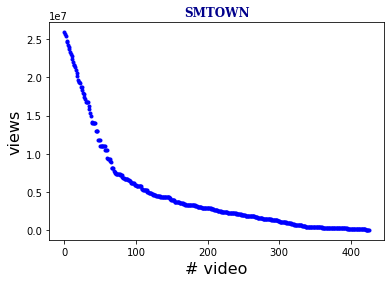

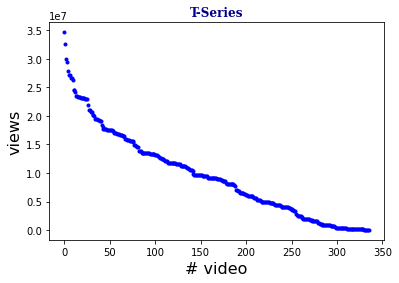

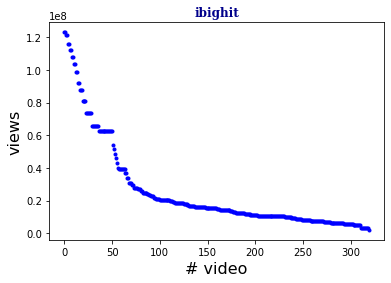

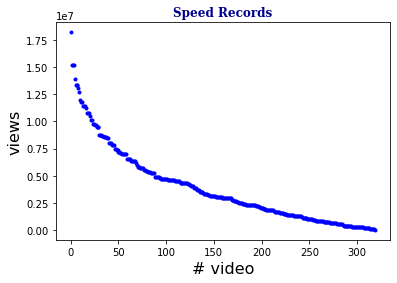

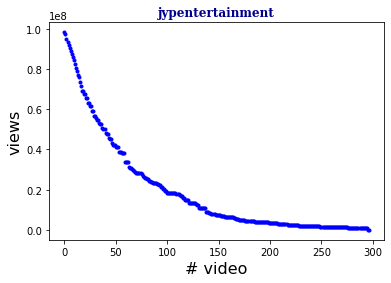

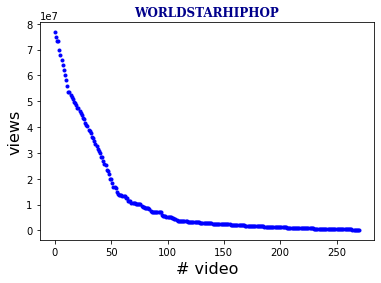

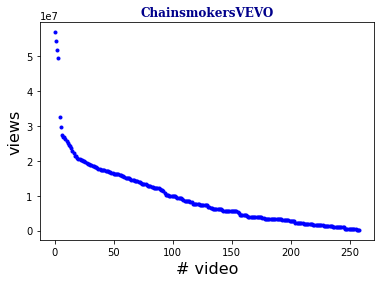

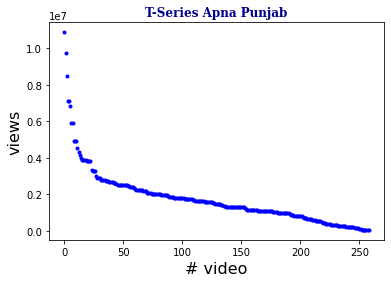

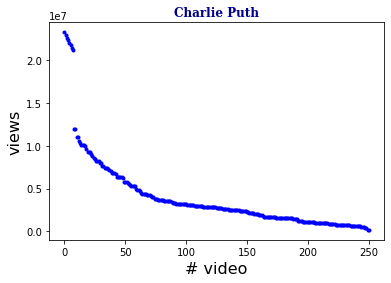

C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45908 missing from cur

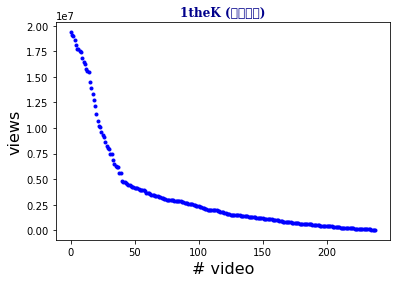

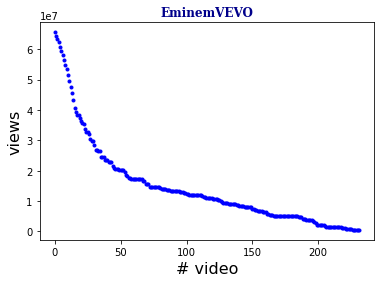

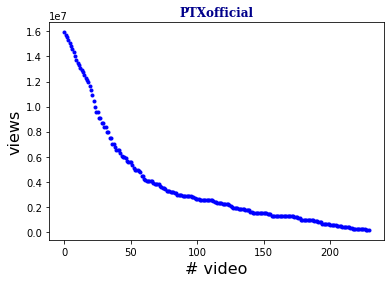

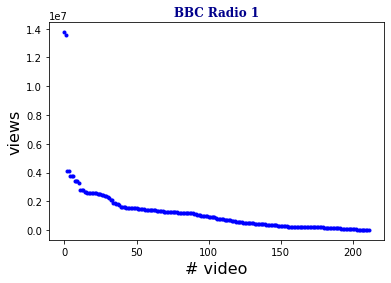

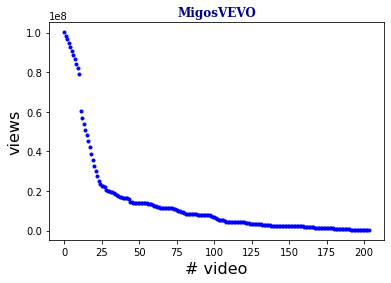

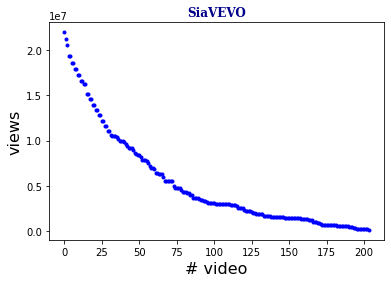

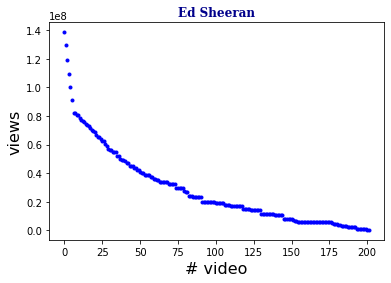

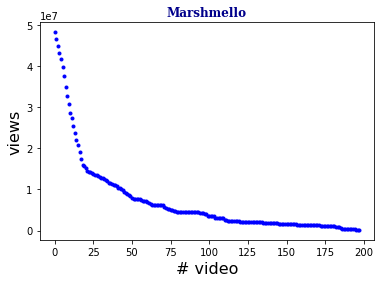

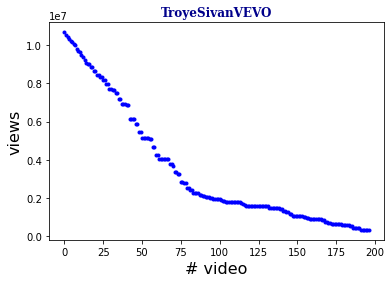

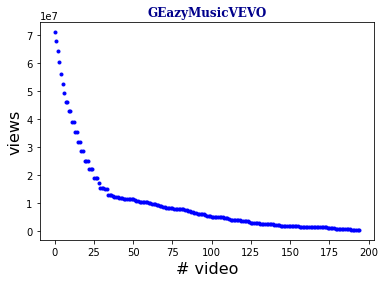

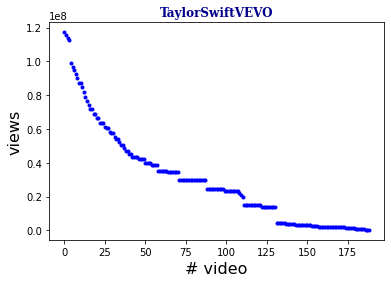

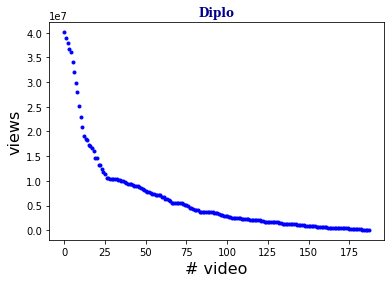

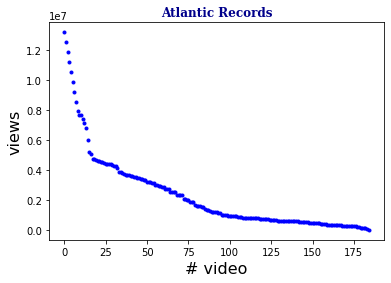

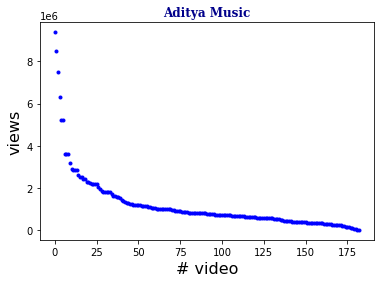

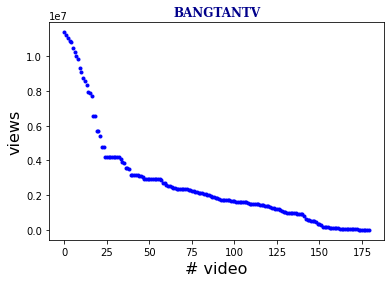

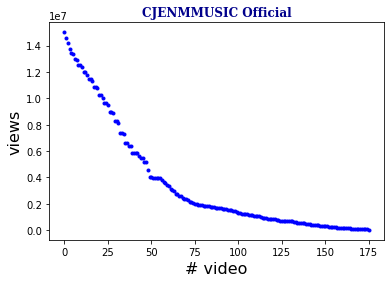

In [228]:
for i in Music1.sort_values(ascending=False)[:25].index:
    Prueba = Music[Music['channel_title'] == i]
    Prueba = Prueba.reset_index()
    Prueba
    x = list(Prueba['views'].sort_values(ascending=False).values)
    plt.plot(x,'.',color="blue")
    plt.xlabel("# video", size = 16,)
    plt.ylabel("views", size = 16)
    plt.title(i, 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 12})
    plt.show()

#### Podemos observar la distribucion de los views de los videos de los canales que mas videos tienen en el dataset, tambien notamos un comportamiento exponencial en la grafica, y tambien notamos datos atipicos en algunos casos, estospodrian darnos cuenta si existe un potencial one hit wonder en el dataset o no. Comparemos

C:\Users\richy\AppData\Local\Temp/ipykernel_9816/799142704.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


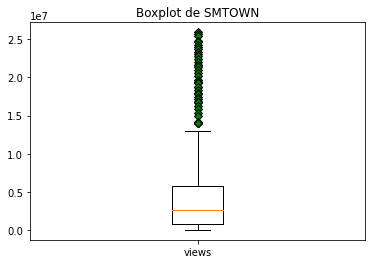

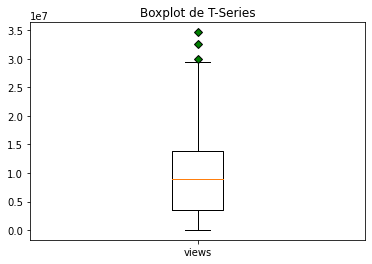

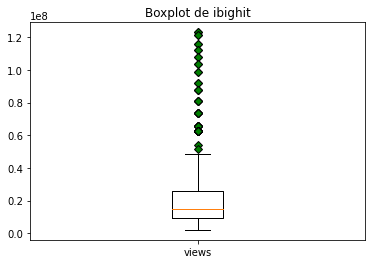

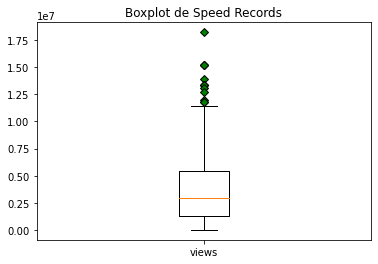

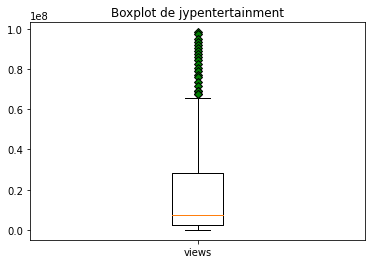

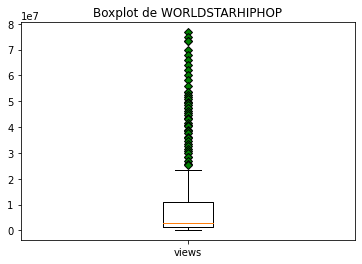

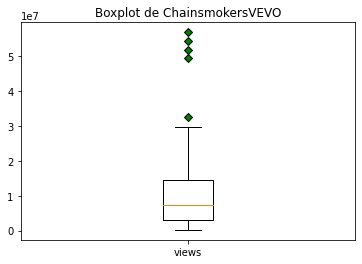

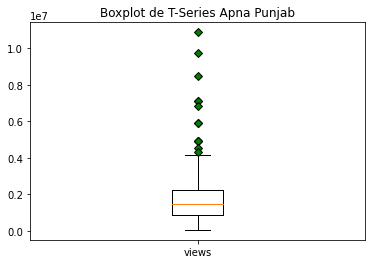

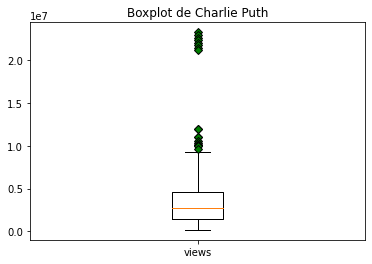

C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\richy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45908 missing from cur

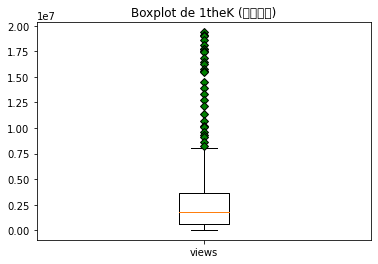

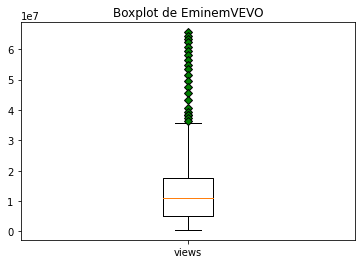

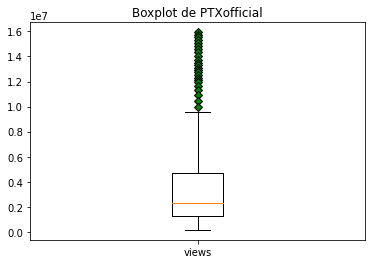

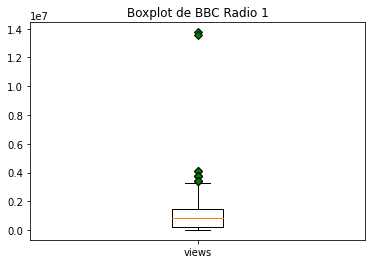

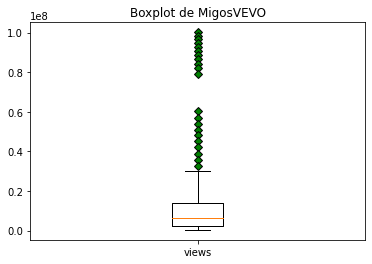

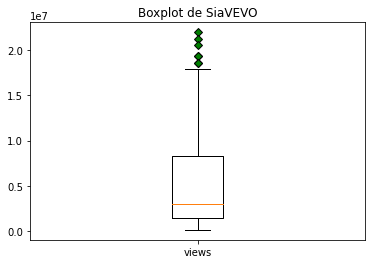

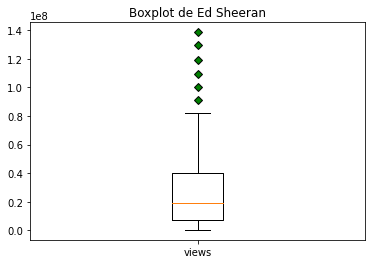

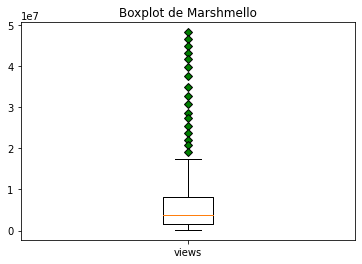

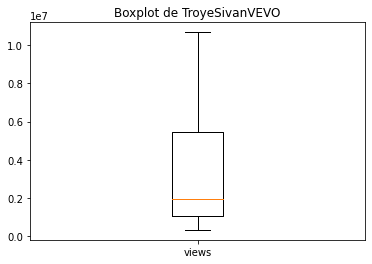

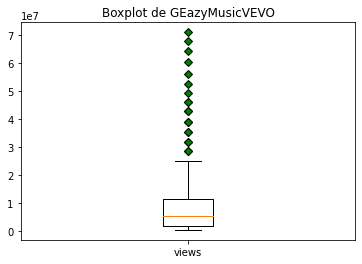

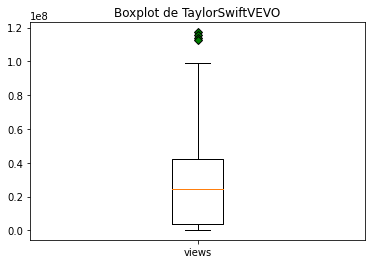

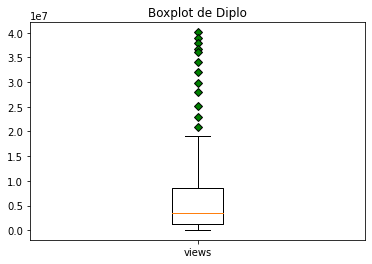

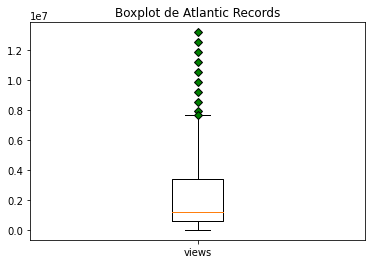

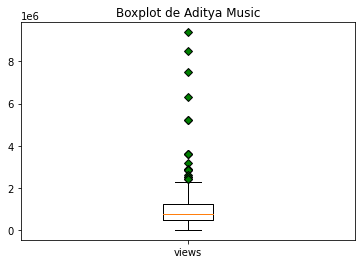

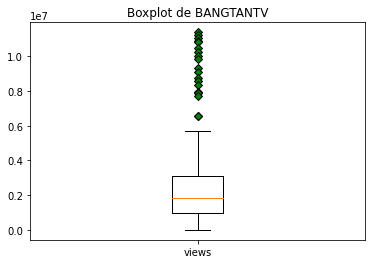

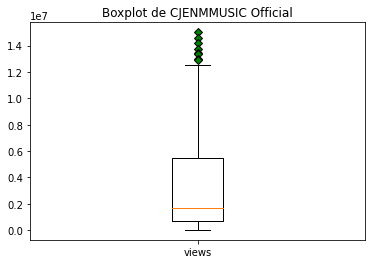

In [229]:
for i in Music1.sort_values(ascending=False)[:25].index:
    Prueba = Music[Music['channel_title'] == i]
    Prueba = Prueba.reset_index()
    Prueba
    x = list(Prueba['views'].sort_values(ascending=False).values)
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig, ax = plt.subplots()
    ax.set_title('Boxplot de ' + i)
    ax.boxplot(x, flierprops=green_diamond, labels=["views"])

#### podemos observar que hay muchos datos atipicos( en el mejor de los casos hay un canal que tiene  videos con muchos likes a comparacion de los otros), entonces no podemos concluir con certeza, sino probablemente que pueden existir algunos posibles One hit wonder. 
#### para poder tener certeza de un posible one hit wonder, seria bueno tener el historico de views a lo largo del tiempo de los videos para poder identificarlo mejor(ya que con identificar un pico unico en el tiempo habria muchisima mas certeza).

### ● Si el objetivo es maximizar las vistas de un video producido:
#### ○ ¿Cuál es el mejor periodo del año para publicar el video?
#### para poder identificar esto, debemos agrupar de acuerdo a los meses del año donde se publicaron los videos, y analizar las vistas que obtuvieron los videos de estas epocas.

In [230]:
DF

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,2018-06-13,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,2018-06-13,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,2018-06-11,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,2018-06-13,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [231]:
fechasVirales = [list(map(lambda x:int(x),i.split('.'))) for i in DF1['trending_date'].values]
fechasVirales = [[i[0]+2000,i[1],i[2]] for i in fechasVirales]
fechasVirales = [i[2] for i in fechasVirales]

DF["trending_date"] = fechasVirales
fechasPublicacion = [list(map(lambda x:int(x),i.split('T')[0].split('-'))) for i in DF1['publish_time'].values]
fechasPublicacion = [i[1] for i in fechasPublicacion]
fechaPublicacion = dt(year = ejemplo[0],month = ejemplo[1], day = ejemplo[2])

DF["publish_time"] = fechasPublicacion
DF

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,11,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,11,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,11,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,11,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,11,I Dare You: GOING BALD!?,nigahiga,Entertainment,11,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,6,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,6,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,6,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,6,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,6,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,6,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,6,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,6,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


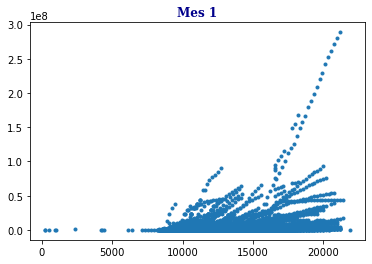

(977547.1983301621, 1078460.5854162583)


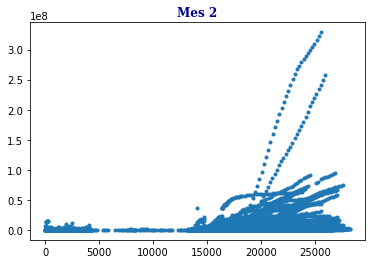

(1452790.210061841, 1596283.9313591335)


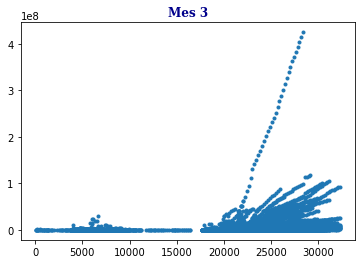

(1317656.761964164, 1447893.0682104419)


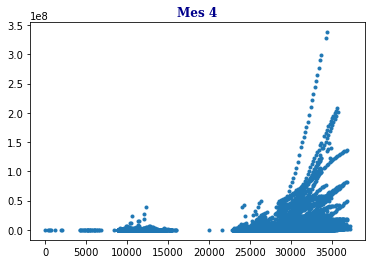

(1882669.749344119, 2058835.1567322698)


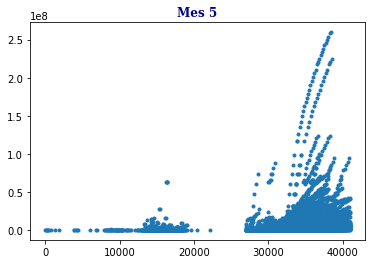

(1674034.8614702171, 1799811.371050841)


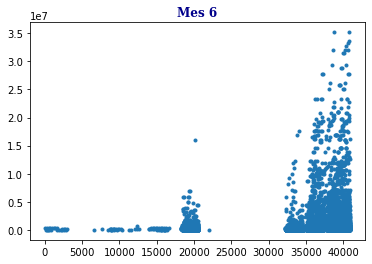

(752025.2247368676, 813716.0813876154)


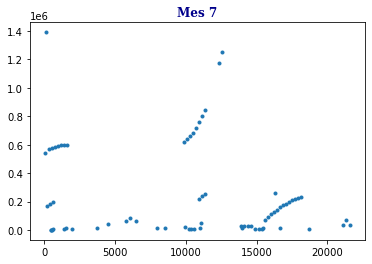

(179462.46495989256, 332331.06928668276)


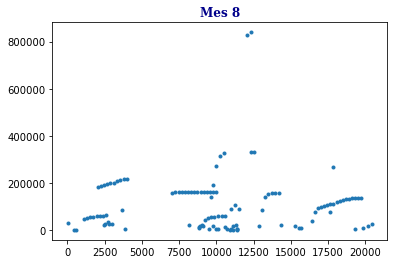

(87676.7512079773, 134161.4039644365)


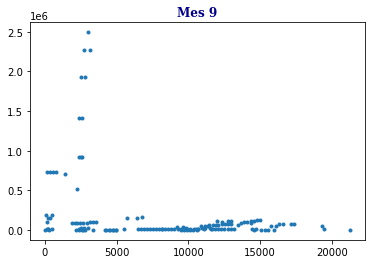

(108782.37433456595, 258303.1920990005)


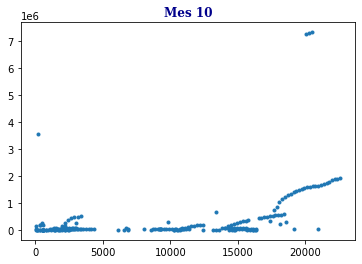

(247062.78498482797, 514029.37539253046)


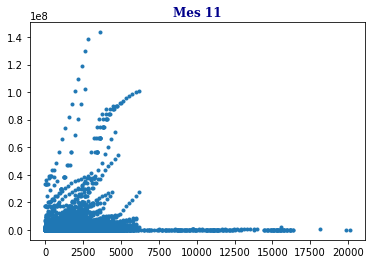

(854893.4758677302, 950711.9108252678)


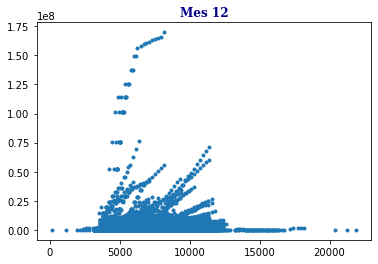

(810847.3072892528, 883937.3914837309)


{1: (977547.1983301621, 1078460.5854162583),
 2: (1452790.210061841, 1596283.9313591335),
 3: (1317656.761964164, 1447893.0682104419),
 4: (1882669.749344119, 2058835.1567322698),
 5: (1674034.8614702171, 1799811.371050841),
 6: (752025.2247368676, 813716.0813876154),
 7: (179462.46495989256, 332331.06928668276),
 8: (87676.7512079773, 134161.4039644365),
 9: (108782.37433456595, 258303.1920990005),
 10: (247062.78498482797, 514029.37539253046),
 11: (854893.4758677302, 950711.9108252678),
 12: (810847.3072892528, 883937.3914837309)}

In [232]:
MejorPeriodoAño = DF[['publish_time','views']]
IC_MejorPeriodoAño = {i:st.t.interval(alpha = 0.95, df = len (MejorPeriodoAño[MejorPeriodoAño['publish_time']== i]['views']) -1, loc = np.mean (MejorPeriodoAño[MejorPeriodoAño['publish_time']== i]['views']), scale = st.sem (MejorPeriodoAño[MejorPeriodoAño['publish_time']== i]['views'])) for i in range(1,13)}
for i in range(1,13):
    x = MejorPeriodoAño[MejorPeriodoAño['publish_time']== i]['views']
    plt.plot(x,'.')
    plt.title('Mes '+ str(i), 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 12})
    plt.show()
    print(st.t.interval(alpha = 0.95, df = len (x) -1, loc = np.mean (x), scale = st.sem (x)))
IC_MejorPeriodoAño

In [233]:
print(max(IC_MejorPeriodoAño, key=IC_MejorPeriodoAño.get))
IC_MejorPeriodoAño.get(4)


4


(1882669.749344119, 2058835.1567322698)

#### con un nivel de confianza del 95% podemos asegurar que la media de vistas del mes de abril se encontrara entre 1882669.75  y 2058835.16, que al compararla con las demas del resto de los meses, es la mayor. por lo que podriamos usar esta epoca del año como referente para publicar un video, al ser el periodo con mas vistas en promedio comparado con el resto.

### ○ ¿Cuáles son los tags que podrían posicionarlo mejor?

#### para analizar esto, miremos los primeros 500 videos en cuestion de visitas y analizemos cuales son los tags mas populares.

#### el tamaño de la muesta es de 384 datos, lo cual al analizar 500 videos tendremos certeza del analizis hecho con dicha muestra.


In [234]:
tags = DF[['tags',"views"]]
tags = tags.sort_values('views',ascending = False)
tags.iloc[:500]

,tags,views
28412,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912
28212,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",413586699
28008,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",402650804
27811,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",392036878
27615,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",382401497
...,...,...
38133,"Maroon|""Girls""|""Like""|""You""|""Interscope""|""Reco...",79004993
31780,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",78969135
18966,"Sebastián|""Yatra""|""No""|""Hay""|""Nadie""|""Más""|""UM...",78893651
31946,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",78854083


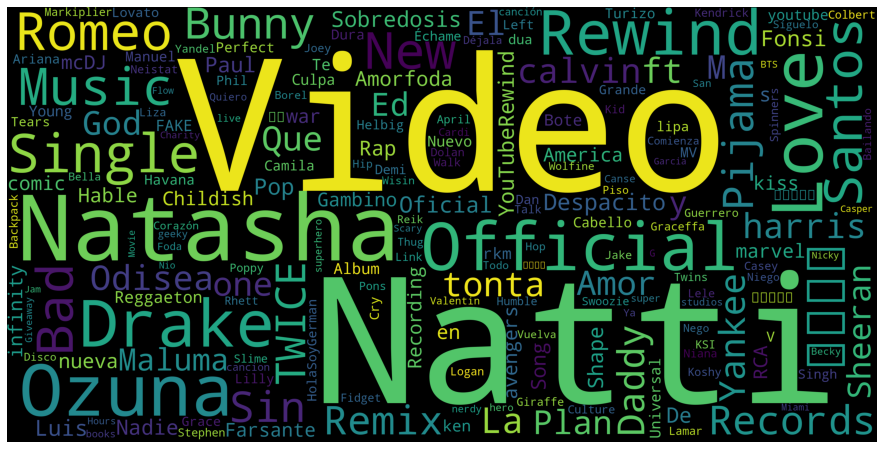

In [235]:
text = '|'.join(tags["tags"].iloc[:500].tolist())

word_cloud_img = WordCloud(width=800*4, height=400*4, collocations=False).generate(text)

# plot
plt.figure(figsize=(20, 8))
plt.imshow(word_cloud_img)
plt.axis("off");

#### como podemos ver en el video anterior, los tags mas usados en los 500 videos con mas views en el dataset son: video, Natti, Natasha, Official, entre otros.
#### si queremos maximizar visitas, lo mejor seria usar estos tags que son muy utilizados en los 500 videos mas vistos del dataset.

### ○ ¿Qué características debería tener el título del vídeo?

#### nuevamente, analizaremos los 500 videos con mas visitas del dataset y miraremos que caraceristicas tienen los titulos de estos.


In [236]:
tags = DF[['title',"views"]]
tags = tags.sort_values('views',ascending = False)
tags.iloc[:1000]

,title,views
28412,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,424538912
28212,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,413586699
28008,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,402650804
27811,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,392036878
27615,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,382401497
...,...,...
3928,Post Malone - rockstar ft. 21 Savage,54871479
39948,Selena Gomez - Back To You (Lyric Video),54863912
22329,"Kendrick Lamar, SZA - All The Stars",54803162
27548,Marvel Studios' Avengers: Infinity War - Offic...,54800233


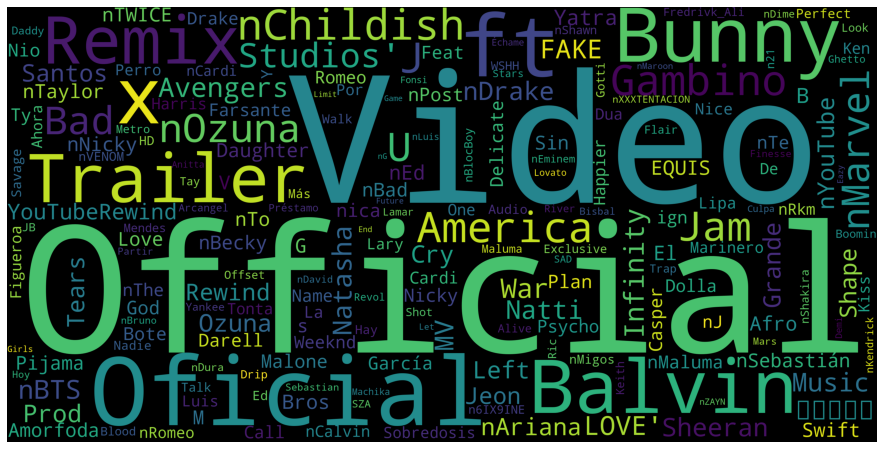

In [237]:
# preprocess
text = '/n'.join(tags["title"].iloc[:1000].tolist())

word_cloud_img = WordCloud(width=800*4, height=400*4, collocations=False).generate(text)

# plot
plt.figure(figsize=(20, 8))
plt.imshow(word_cloud_img)
plt.axis("off");